<a href="https://colab.research.google.com/github/JoeBwonKenobi/Car-Insurance-Project/blob/main/Project2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project2 Part 3**

Joe Lardie

Jan 2023

##**Objective Review**

- Requirements:

- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.

##**Imports**

In [1]:
#Numpy
import numpy as np

#Pandas
import pandas as pd

#Seaborn
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import set_config
set_config(display = 'diagram')

##**Loading Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Load Data for Car Insurance Data
card = '/content/drive/MyDrive/CodingDojo/Colab Notebooks/Stack 2/Data/Car Insurance Data.csv'
df = pd.read_csv(card)
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


In [4]:
#Making a copy of data frame
cid = df.copy()

In [5]:
# Display the number of rows and columns for the dataframe
cid.shape
print(f'There are {cid.shape[0]} rows, and {cid.shape[1]} columns.')
print(f'The rows represent {cid.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 10000 rows, and 19 columns.
The rows represent 10000 observations, and the columns represent 18 features and 1 target variable.


In [6]:
#Retreiveing basic info about our data
cid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  int64  
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  int64  
 11  CHILDREN             10000 non-null  int64  
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [7]:
cid.describe(include='all')

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000,10000,10000,10000,10000,10000,9018.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,9043.000000,10000,10000.000000,10000.00000,10000.000000,10000.000000
unique,NaN,4,2,2,4,3,4,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,26-39,female,majority,0-9y,high school,upper class,NaN,NaN,before 2015,NaN,NaN,NaN,NaN,sedan,NaN,NaN,NaN,NaN
freq,NaN,3063,5010,9012,3530,4157,4336,NaN,NaN,6967,NaN,NaN,NaN,NaN,9523,NaN,NaN,NaN,NaN
mean,500521.906800,NaN,NaN,NaN,NaN,NaN,NaN,0.515813,0.697000,NaN,0.498200,0.688800,19864.548400,11697.003207,NaN,1.482900,0.23920,1.056300,0.313300
std,290030.768758,NaN,NaN,NaN,NaN,NaN,NaN,0.137688,0.459578,NaN,0.500022,0.463008,18915.613855,2818.434528,NaN,2.241966,0.55499,1.652454,0.463858
min,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.053358,0.000000,NaN,0.000000,0.000000,10238.000000,2000.000000,NaN,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,NaN,NaN,NaN,NaN,NaN,NaN,0.417191,0.000000,NaN,0.000000,0.000000,10238.000000,10000.000000,NaN,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.525033,1.000000,NaN,0.000000,1.000000,10238.000000,12000.000000,NaN,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,NaN,NaN,NaN,NaN,NaN,NaN,0.618312,1.000000,NaN,1.000000,1.000000,32765.000000,14000.000000,NaN,2.000000,0.00000,2.000000,1.000000


###**Taking out Unecessary columns**

In [8]:
#The 'ID' column is not relevant to our target, therefore we will get rid if it
cid.drop('ID', axis=1, inplace=True)

###**Dropping Duplicate Rows**

In [9]:
# Display the number of duplicate rows in the dataset
print(f'There are {cid.duplicated().sum()} duplicate rows.')

There are 12 duplicate rows.


In [10]:
#Dropping duplicated Rows
cid = cid.drop_duplicates()

In [11]:
# Comfirming there are no more duplicates 
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


##**Checking for Missing Values**

In [12]:
#Checking for missing values
cid[cid.isna().any(axis=1)].shape

(1839, 18)

In [13]:
#Identifying the columns containing missing values
cid.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           970
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         954
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

- These missing values can be imputed using a simple imputer strategy 'mean'

In [14]:
#Imputer
imputer= SimpleImputer(strategy='mean')
imputer

SimpleImputer()

In [15]:
cid['CREDIT_SCORE']= imputer.fit_transform(cid[['CREDIT_SCORE']])

In [16]:
cid['ANNUAL_MILEAGE']= imputer.fit_transform(cid[['ANNUAL_MILEAGE']])

###**Checking Vaule Counts**

In [17]:
for col in cid.columns:
    print(cid[col].value_counts())

26-39    3062
40-64    2931
16-25    2005
65+      1990
Name: AGE, dtype: int64
female    5003
male      4985
Name: GENDER, dtype: int64
majority    9000
minority     988
Name: RACE, dtype: int64
0-9y      3519
10-19y    3298
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64
high school    4151
university     3927
none           1910
Name: EDUCATION, dtype: int64
upper class      4335
middle class     2138
poverty          1804
working class    1711
Name: INCOME, dtype: int64
0.515813    970
0.428487      1
0.594531      1
0.396540      1
0.578306      1
           ... 
0.309272      1
0.847325      1
0.432080      1
0.527041      1
0.435225      1
Name: CREDIT_SCORE, Length: 9019, dtype: int64
1    6967
0    3021
Name: VEHICLE_OWNERSHIP, dtype: int64
before 2015    6955
after 2015     3033
Name: VEHICLE_YEAR, dtype: int64
0    5007
1    4981
Name: MARRIED, dtype: int64
1    6885
0    3103
Name: CHILDREN, dtype: int64
10238    6929
32765    2455
92101     484
21217  

In [18]:
value_counts = cid.apply(pd.value_counts).stack()

In [19]:
cid.value_counts('CREDIT_SCORE')

CREDIT_SCORE
0.515813    970
0.053358      1
0.586561      1
0.586290      1
0.586321      1
           ... 
0.457110      1
0.457073      1
0.456999      1
0.456883      1
0.960819      1
Length: 9019, dtype: int64

In [20]:
cid['CREDIT_SCORE'] = cid['CREDIT_SCORE'] * 10**3

In [21]:
cid.value_counts('CREDIT_SCORE')

CREDIT_SCORE
515.812810    970
53.357545       1
586.561224      1
586.289570      1
586.320546      1
             ... 
457.110218      1
457.072833      1
456.998546      1
456.883465      1
960.818828      1
Length: 9019, dtype: int64

In [22]:
x= cid.drop('OUTCOME', axis=1)
y=cid['OUTCOME']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42)

##**Univariate Visualization**

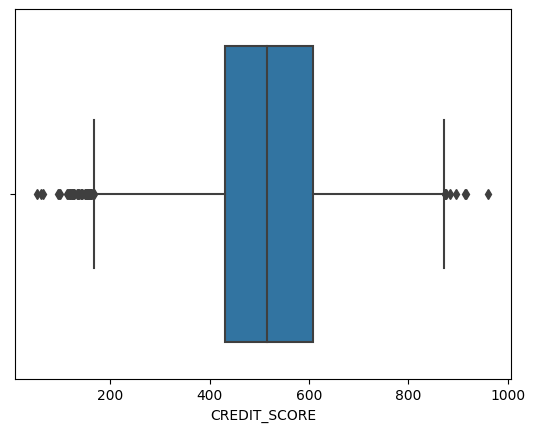

In [24]:
sns.boxplot(data=cid, x='CREDIT_SCORE');

- Above we see the median credit score is about 520

<ipython-input-25-82e0c729715f>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


<Axes: xlabel='VEHICLE_OWNERSHIP', ylabel='INCOME'>

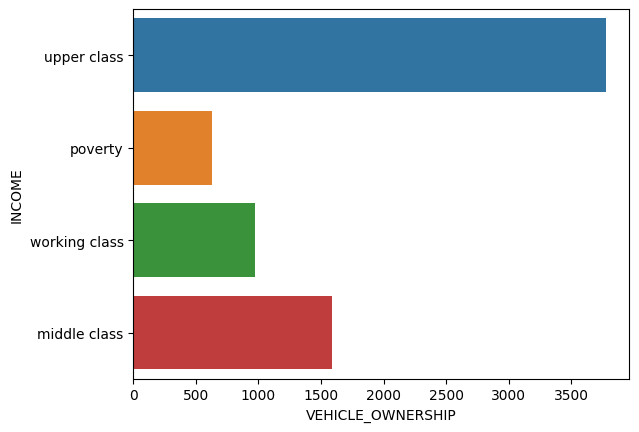

In [25]:
sns.barplot(
    x="VEHICLE_OWNERSHIP", 
    y="INCOME", 
    data=df, 
    estimator=sum, 
    ci=None)

<ipython-input-26-e573ee7188ae>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


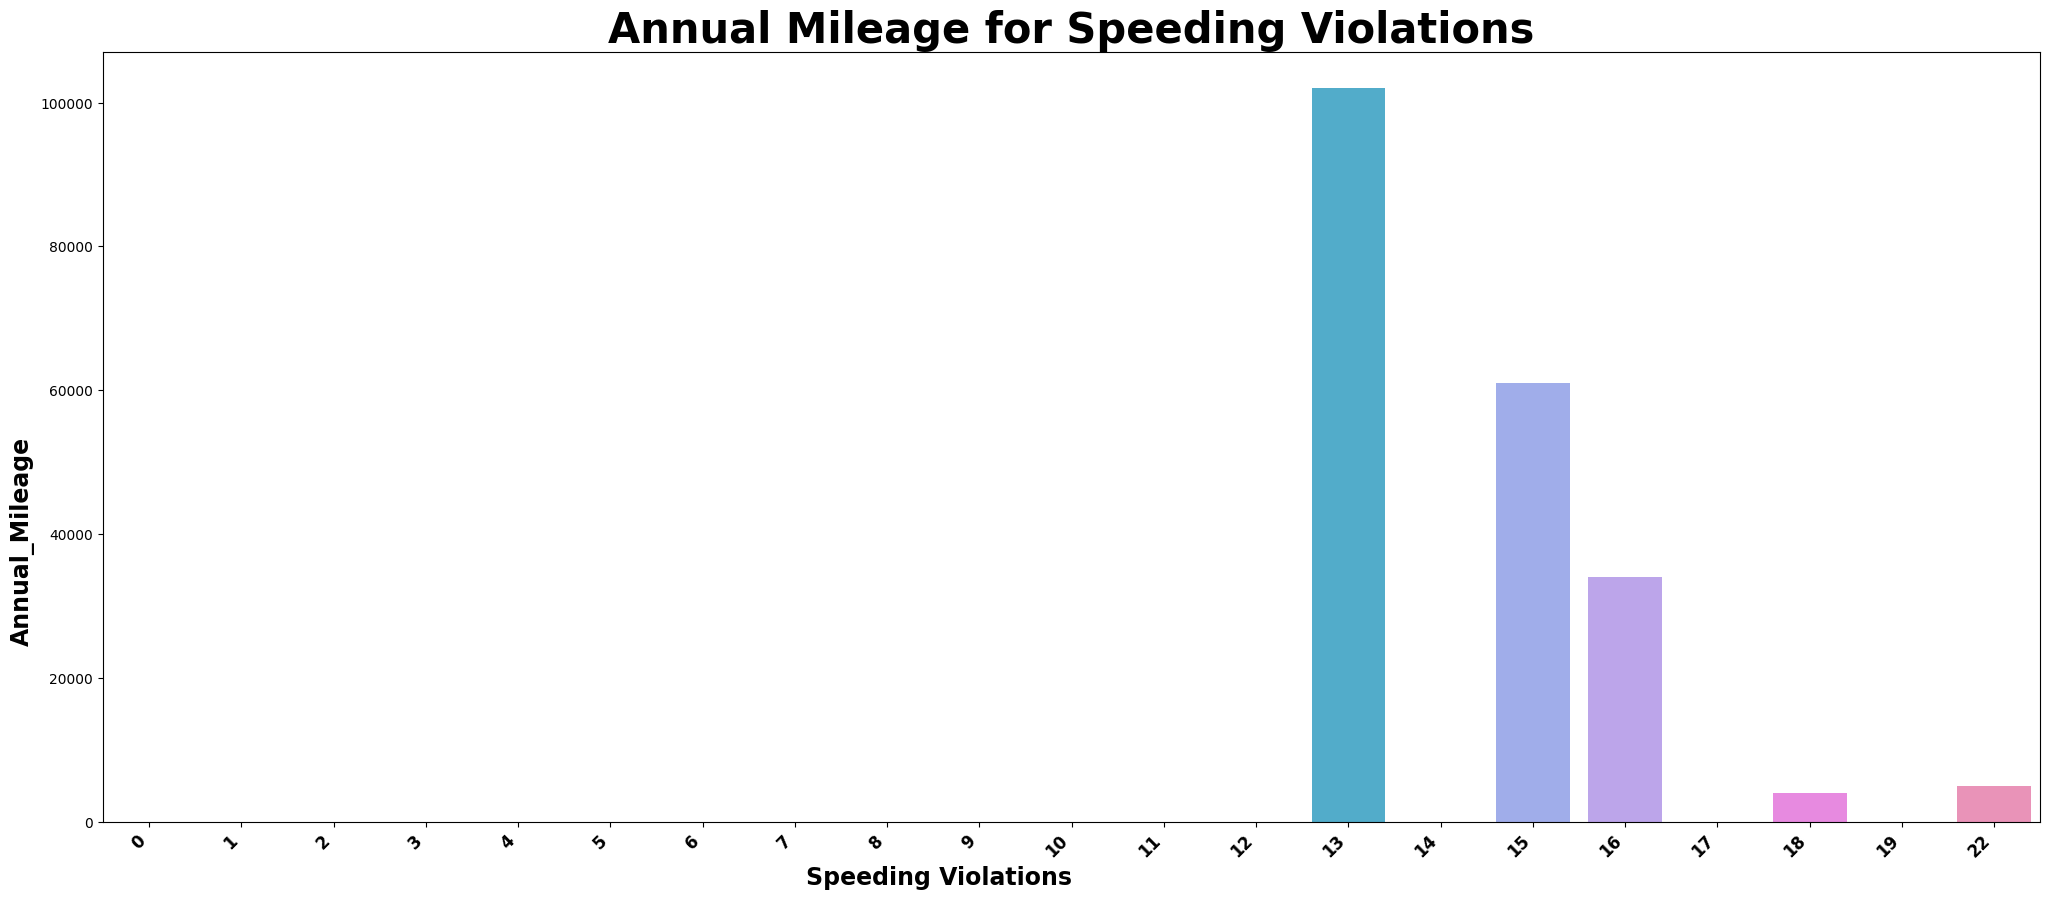

In [26]:
# Set the figure size
plt.figure(figsize=(25, 10));
sns.barplot(
    x="SPEEDING_VIOLATIONS", 
    y="ANNUAL_MILEAGE", 
    data=df, 
    estimator=sum, 
    ci=None)
# Add title and axis names
plt.xticks(rotation=45, fontsize = 12, fontweight = 'bold', ha = 'right');
plt.title('Annual Mileage for Speeding Violations',fontweight='bold', color = 'Black', fontsize='30', horizontalalignment='center');
plt.xlabel('Speeding Violations',fontweight='bold', fontsize='17', horizontalalignment='right');
plt.ylabel('Annual_Mileage',fontweight='bold', fontsize='17', horizontalalignment='right');
plt.show()